In [1]:
#Lab 1
#Jeremy Koertzen
%pylab inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


[[[-25 -25 -25 ... -25 -25 -25]
  [-24 -24 -24 ... -24 -24 -24]
  [-23 -23 -23 ... -23 -23 -23]
  ...
  [ 23  23  23 ...  23  23  23]
  [ 24  24  24 ...  24  24  24]
  [ 25  25  25 ...  25  25  25]]

 [[-25 -24 -23 ...  23  24  25]
  [-25 -24 -23 ...  23  24  25]
  [-25 -24 -23 ...  23  24  25]
  ...
  [-25 -24 -23 ...  23  24  25]
  [-25 -24 -23 ...  23  24  25]
  [-25 -24 -23 ...  23  24  25]]]
[[35.35533906 34.6554469  33.9705755  ... 33.9705755  34.6554469
  35.35533906]
 [34.6554469  33.9411255  33.24154028 ... 33.24154028 33.9411255
  34.6554469 ]
 [33.9705755  33.24154028 32.52691193 ... 32.52691193 33.24154028
  33.9705755 ]
 ...
 [33.9705755  33.24154028 32.52691193 ... 32.52691193 33.24154028
  33.9705755 ]
 [34.6554469  33.9411255  33.24154028 ... 33.24154028 33.9411255
  34.6554469 ]
 [35.35533906 34.6554469  33.9705755  ... 33.9705755  34.6554469
  35.35533906]]


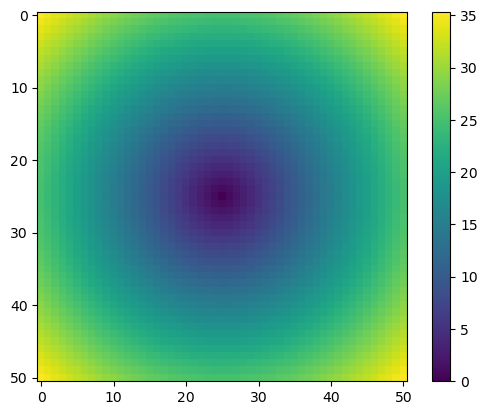

In [2]:
#Practice

#coords = np.mgrid[0:10,0:10]
coords = np.mgrid[-25:26,-25:26]
print(coords)

xgrid = coords[1,:,:]
ygrid = coords[0,:,:]
#print(xgrid)
#print(ygrid)

r = np.hypot(xgrid,ygrid)
print(r)

plt.imshow(r)
plt.colorbar()

#plt.scatter(coords[0],coords[1],color="blue")
#plt.show()

#print(coords)


C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_16600\1392611507.py:12: RuntimeWarning: divide by zero encountered in divide
  return (1/(4*np.pi))*(self.q/distance)


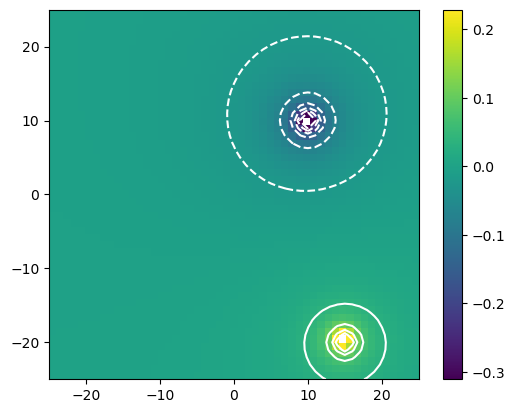

In [3]:
#Encapsulation Practice

import numpy as np
class Charge:
    def __init__(self,x,y,q):
        self.x = x
        self.y = y
        self.q = q
        return
    def potential(self,xgrid,ygrid):
        distance = ((self.x - xgrid)**2 + (self.y - ygrid)**2)**0.5
        return (1/(4*np.pi))*(self.q/distance)

#potential = self.q/(4*np.pi*r)

chargelist = [Charge(3,-1,4),Charge(7.5,0,-1)]
#chargelist = [Charge( 7.5,0, 1), Charge(7.5,0, 1), Charge(0,5.5,+1), Charge(0, 5.5,+1)]
#test = Charge.potential(xgrid,ygrid)
#print(test)
my_charge = Charge(10,10,-4)
second_charge = Charge(15,-20,3)

range = np.array(0)

potential = my_charge.potential(xgrid,ygrid)
potential += second_charge.potential(xgrid,ygrid)
plt.imshow(potential,extent=[-25,25,-25,25],origin='lower')
plt.colorbar()
plt.contour(xgrid,ygrid,potential,levels = np.linspace(-0.3,0.2,10),colors='white')
#plt.colorbar()


C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_16600\218287689.py:19: RuntimeWarning: divide by zero encountered in divide
  return (self.q/distance)


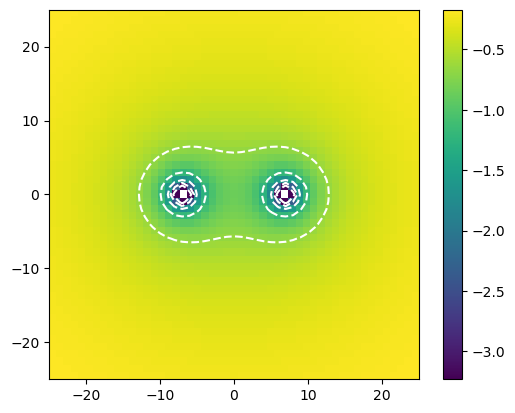

In [14]:
#Problem 1:

#Creating the coordinates:

coords = np.mgrid[-25:26,-25:26]
xgrid = coords[1,:,:]
ygrid = coords[0,:,:]

#Creating the Charge class and potential method:

class Charge:
    def __init__(self,x,y,q):
        self.x = x
        self.y = y
        self.q = q
        return
    def potential(self,xgrid,ygrid):
        distance = ((self.x - xgrid)**2 + (self.y - ygrid)**2 )**0.5
        return (self.q/distance)

#Creating the charges:

chargelist = [Charge(-7,0,-3),Charge(7,0,-3)]

#Creating the potential plot

v = np.zeros((51,51))

for charge in chargelist:
    v += charge.potential(xgrid,ygrid)

plt.imshow(v,extent=[-25,25,-25,25],origin='lower')
plt.colorbar()

#Creating the contours

plt.contour(xgrid,ygrid,v,levels=np.linspace(-4,1,10),colors='white')

#The potential of a dipole should decrease proportionally to 1/r**2. 


C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_16600\3760365592.py:19: RuntimeWarning: divide by zero encountered in divide
  return (self.q/distance)


-0.06666666666666665
-0.06112054329371816
the calculated decrease in potential: 
0.9168081494057726
the expected decrease in potential: 
0.9604
Far from the dipole, the potential decreases as 1/r**2.


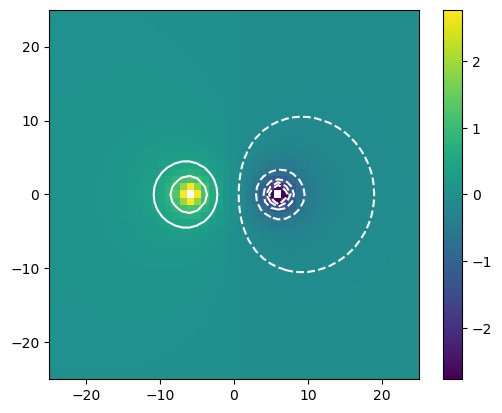

In [13]:
#Problem 2:

#Creating the charges:

chargelist = [Charge(-6,0,3),Charge(6,0,-3)]

#Creating the potential plot

v = np.zeros((51,51))

for charge in chargelist:
    v += charge.potential(xgrid,ygrid)

plt.imshow(v,extent=[-25,25,-25,25],origin='lower')
plt.colorbar()

#Creating the contours

plt.contour(xgrid,ygrid,v,levels=np.linspace(-4,1,10),colors='white')

#Checking my work

p1 = v[25,49]
p2 = v[25,50]
print(p1)
print(p2)

ratio = p2/p1
print("the calculated decrease in potential: ")
print(ratio)
print("the expected decrease in potential: ")
print((49**2)/(50**2))
print("Far from the dipole, the potential decreases as 1/r**2.")


C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_16600\3760365592.py:19: RuntimeWarning: divide by zero encountered in divide
  return (self.q/distance)


Text(1, 0.8, 'Caption: The potential of four point charges. This configuration is called a quadrupole.')

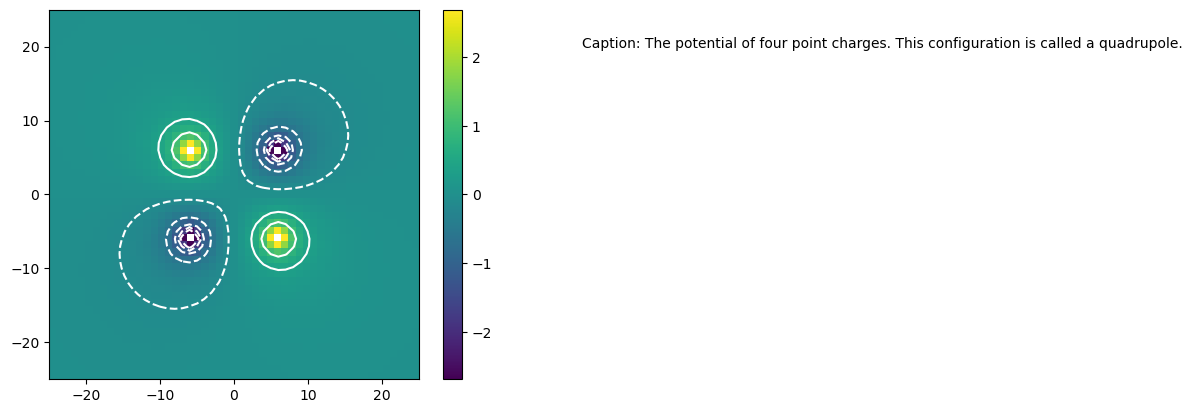

In [6]:
#Problem 3:

#Creating the charges:

chargelist = [Charge(-6,6,3),Charge(6,-6,3),Charge(-6,-6,-3),Charge(6,6,-3)]

#Creating the potential plot

v = np.zeros((51,51))

for charge in chargelist:
    v += charge.potential(xgrid,ygrid)

plt.imshow(v,extent=[-25,25,-25,25],origin='lower')
plt.colorbar()

#Creating the contours

plt.contour(xgrid,ygrid,v,levels=np.linspace(-4,1,10),colors='white')

#Creating the caption:

txt = "Caption: The potential of four point charges. This configuration is called a quadrupole."
plt.figtext(1,0.8,txt)


[[ 73.74844669  75.31053238  77.54090529 ... -79.8724044  -77.54090529
  -75.99804145]
 [ 71.1682734   72.82121776  75.08209536 ... -77.46091545 -75.08209536
  -73.44113381]
 [ 68.99510326  70.73133172  72.97952352 ... -75.34860535 -72.97952352
  -71.25419527]
 ...
 [-68.99510326 -70.73133172 -72.97952352 ...  75.34860535  72.97952352
   71.25419527]
 [-71.1682734  -72.82121776 -75.08209536 ...  77.46091545  75.08209536
   73.44113381]
 [-73.74844669 -75.31053238 -77.54090529 ...  79.8724044   77.54090529
   75.99804145]]


C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_16600\3760365592.py:19: RuntimeWarning: divide by zero encountered in divide
  return (self.q/distance)


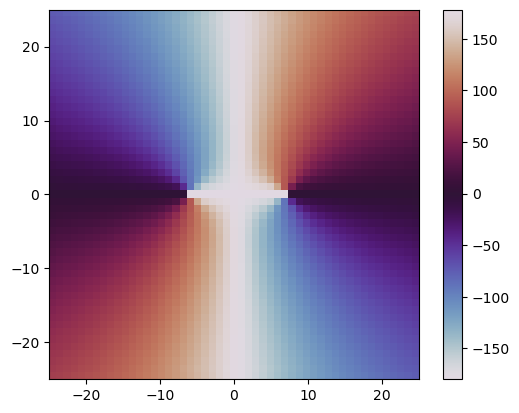

In [7]:
#Problem 4:
from matplotlib import colormaps
#list(colormaps)

#Calculating the gradient:


#chargelist = [Charge(-6.6,6.6,3),Charge(6.5,-6.5,3),Charge(-6.5,-6.5,-3),Charge(6.5,6.5,-3)]
chargelist = [Charge(-6,0,-3),Charge(7,0,3)]
#chargelist = [Charge(-6,0,-3)]

v = np.zeros((51,51))

for charge in chargelist:
    v += charge.potential(xgrid,ygrid)

E = np.gradient(v)

Ex = E[1]
Ey = E[0]
anglerad = np.arctan2(-Ey,-Ex)
#print(anglerad)
angledeg = np.degrees(anglerad)
print(angledeg)

plt.imshow(angledeg,extent=[-25,25,-25,25],origin='lower',cmap='twilight')
plt.colorbar()


Reflection:

Calculating the potential and then the electric field is easier
than calculating the electric field directly because the electric
field is a vector, thus the calculation to get it is more difficult
than the calculation for the potential, which is a scalar field. Using
np.gradient is also very easy to use. The weakness of the potential
method is that it is difficult to graph both the electric field and 
the direction of the electric field. 